In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [25]:
w=32

In [26]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [27]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7f8e30700000
byteorder:  little
byteswap:  False
type: float64


In [28]:
my_array =dataFromSensors[:1]
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(suppress=True)


In [29]:
print(my_array)


[[[0.         0.49157834 0.86486486 0.40034662 0.40213523 0.02145491 0.00307325 0.50816583 0.32602568 0.54202192 0.3442623  0.93694444 0.04504505 0.80035651 0.02466828 0.00174415]
  [0.         0.49215751 0.86486486 0.40034662 0.40213523 0.02656721 0.00375619 0.50722362 0.32633887 0.54202192 0.39344262 0.93833333 0.04504505 0.80035651 0.03004879 0.00207956]
  [0.         0.49206274 0.86486486 0.40034662 0.40213523 0.01969494 0.00273177 0.50942211 0.32602568 0.5408039  0.44262295 0.93833333 0.04504505 0.80035651 0.02266199 0.00160998]
  [0.         0.49188372 0.86486486 0.40034662 0.40391459 0.02732149 0.00392693 0.50753769 0.32633887 0.53958587 0.41803279 0.92527778 0.04954955 0.80035651 0.03064156 0.00221373]
  [0.         0.49244183 0.86486486 0.40034662 0.40213523 0.02388535 0.00341472 0.50659548 0.32602568 0.53714982 0.40163934 0.93027778 0.04954955 0.80035651 0.02708495 0.00194539]
  [0.         0.49212066 0.86486486 0.39688042 0.40213523 0.02623198 0.00375619 0.50439698 0.3263388

In [31]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")
print(labels[:1])

[0.]


In [24]:
np.info(labels)

class:  ndarray
shape:  (475335,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1f4dd745040
byteorder:  little
byteswap:  False
type: float64


In [25]:
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)

In [26]:
training_sample_labels

380268

In [27]:
training_sample

380268

In [28]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [29]:
train_X.shape

(380268, 2, 15)

In [30]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
train_y.shape

(380268,)

In [34]:
train_y=train_y.reshape(train_y.shape[0],1)

In [35]:
test_y=test_y.reshape(test_y.shape[0],1)

In [37]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380268, 2, 15) (380268, 1) (95067, 2, 15) (95067, 1)


In [38]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    keras.layers.Dense(units=40,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [39]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 2, 128)            55680     
                                                                 
 gru_1 (GRU)                 (None, 2, 64)             37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 40)                1320      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 103,697
Trainable params: 103,697
Non-trainable params: 0
_________________________________________________________________


In [40]:
start = t.time()

In [41]:
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 66s 18ms/step - loss: 0.5757 - accuracy: 0.7393 - val_loss: 0.5592 - val_accuracy: 0.7531
Epoch 2/140
2971/2971 [==============================] - 52s 17ms/step - loss: 0.5732 - accuracy: 0.7393 - val_loss: 0.5587 - val_accuracy: 0.7531
Epoch 3/140
2971/2971 [==============================] - 51s 17ms/step - loss: 0.5727 - accuracy: 0.7393 - val_loss: 0.5583 - val_accuracy: 0.7531
Epoch 4/140
2971/2971 [==============================] - 52s 18ms/step - loss: 0.5717 - accuracy: 0.7393 - val_loss: 0.5569 - val_accuracy: 0.7531
Epoch 5/140
2971/2971 [==============================] - 52s 17ms/step - loss: 0.5700 - accuracy: 0.7393 - val_loss: 0.5548 - val_accuracy: 0.7531
Epoch 6/140
2971/2971 [==============================] - 51s 17ms/step - loss: 0.5663 - accuracy: 0.7393 - val_loss: 0.5501 - val_accuracy: 0.7531
Epoch 7/140
2971/2971 [==============================] - 52s 17ms/step - loss: 0.5576 - accuracy: 0.7393 - val_loss: 0

2971/2971 [==============================] - 47s 16ms/step - loss: 0.4460 - accuracy: 0.7645 - val_loss: 0.4399 - val_accuracy: 0.7704
Epoch 112/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4458 - accuracy: 0.7648 - val_loss: 0.4387 - val_accuracy: 0.7710
Epoch 113/140
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4456 - accuracy: 0.7654 - val_loss: 0.4374 - val_accuracy: 0.7728
Epoch 114/140
2971/2971 [==============================] - 48s 16ms/step - loss: 0.4455 - accuracy: 0.7653 - val_loss: 0.4353 - val_accuracy: 0.7732
Epoch 115/140
2971/2971 [==============================] - 46s 16ms/step - loss: 0.4452 - accuracy: 0.7659 - val_loss: 0.4358 - val_accuracy: 0.7724
Epoch 116/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.4450 - accuracy: 0.7658 - val_loss: 0.4359 - val_accuracy: 0.7730
Epoch 117/140
2971/2971 [==============================] - 50s 17ms/step - loss: 0.4448 - accuracy: 0.7663 - val_loss: 0

In [42]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 16s 5ms/step


In [43]:
stop=t.time()-start
print(stop)

7082.768437623978


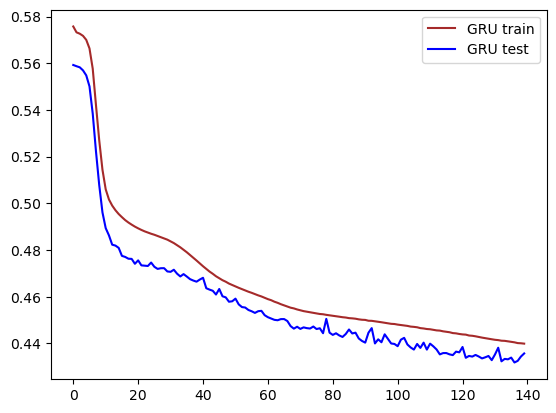

In [44]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [45]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [46]:
np.shape(pred_y)

(95067, 1)

In [47]:
pred_y

array([[3.7149206e-05],
       [2.1814324e-04],
       [1.2008458e-03],
       ...,
       [5.5719364e-02],
       [6.1366349e-02],
       [6.2142078e-02]], dtype=float32)

In [49]:
pred_y=np.reshape(pred_y,95067)

0.14572870143303682
0.21634998938212913
0.38174428801625415
0.27917599780109187


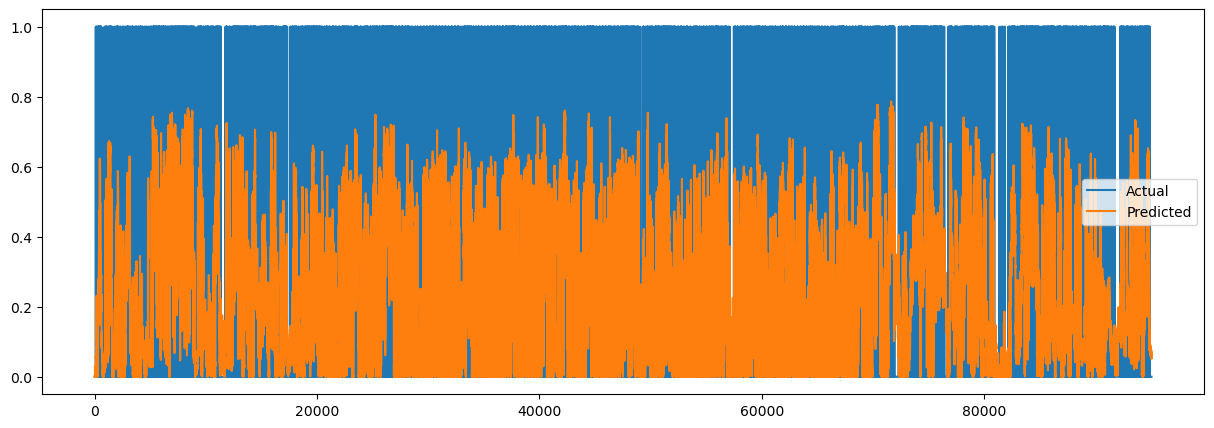

In [50]:
plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [51]:
np.shape(train_X)

(380268, 2, 15)

In [52]:
np.shape(train_y)

(380268, 1)

In [53]:
np.shape(test_X)

(95067, 2, 15)

In [54]:
np.shape(test_y)

(95067, 1)

14855/14855 [==============================] - 75s 5ms/step


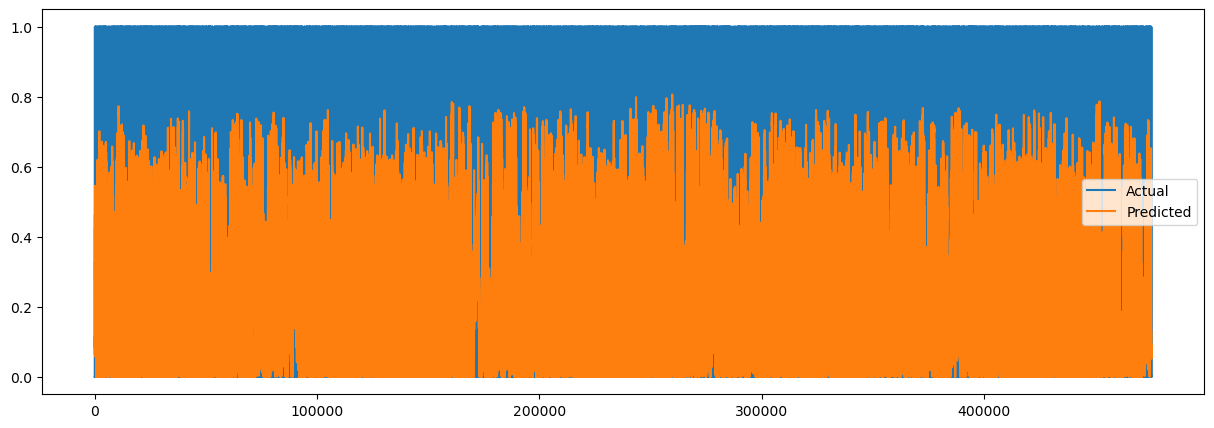

In [55]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

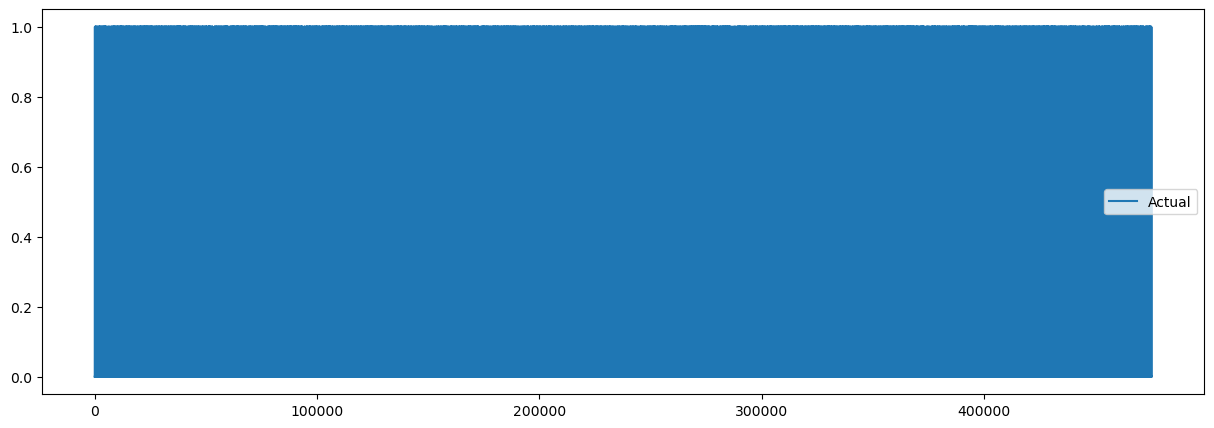

In [56]:
plt.plot(tes, label = 'Actual')
plt.legend()
plt.show()

In [57]:
print(sum(tes)/len(tes))

[0.25793809]


In [58]:
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.61537739]
[0.79754874]
total acc [0.77306952]


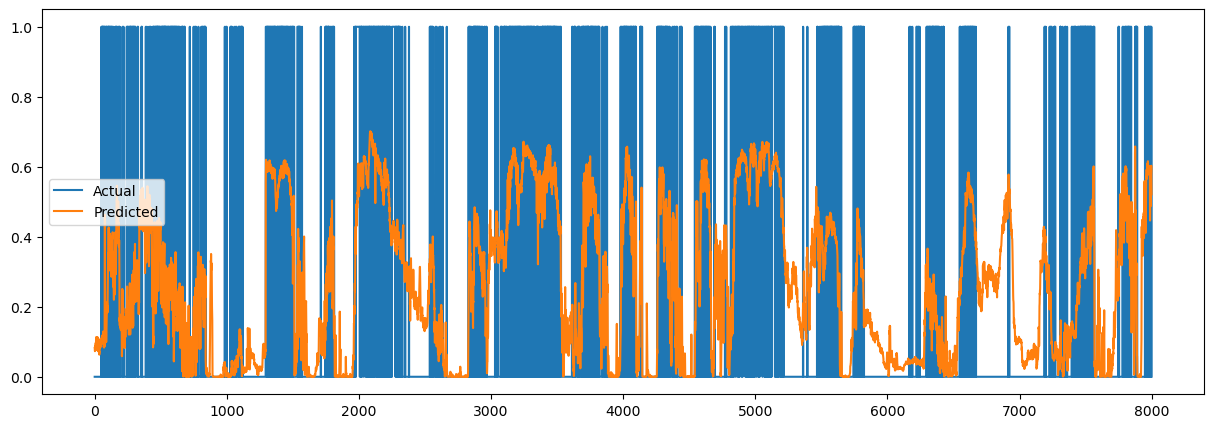

In [59]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

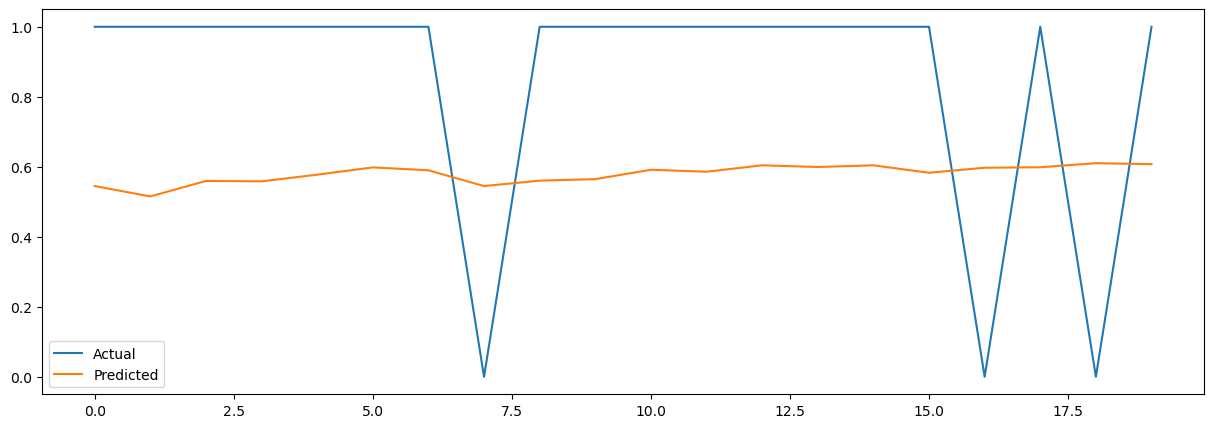

In [60]:
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

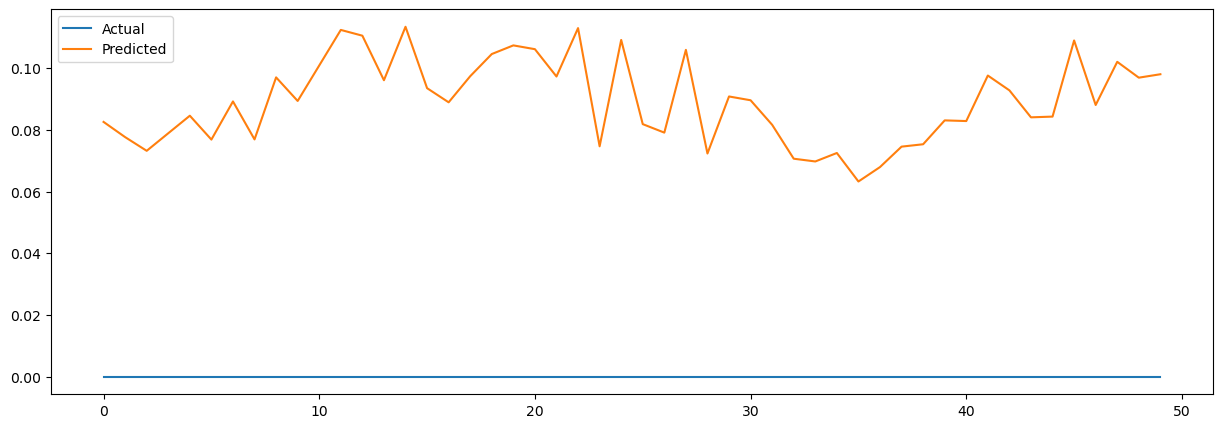

In [61]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

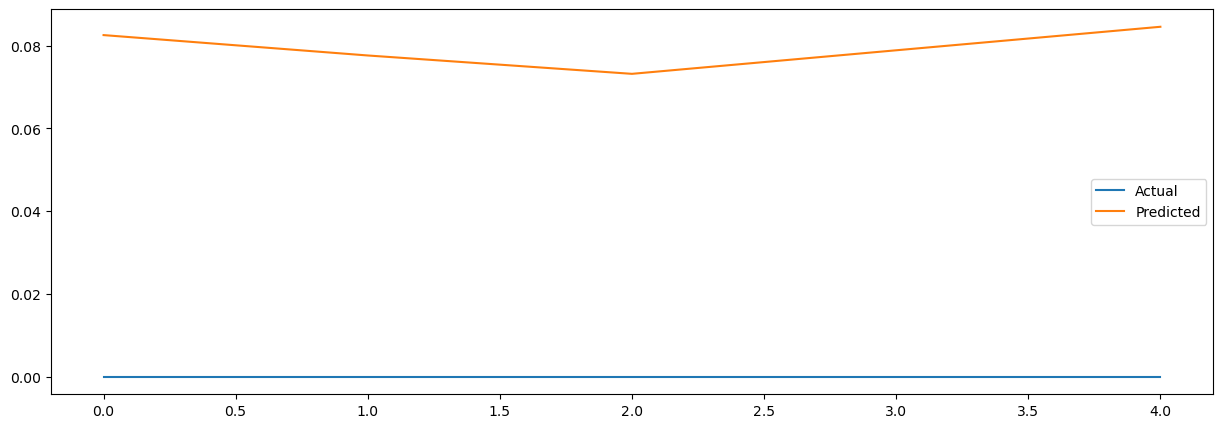

In [62]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()